In [ ]:
'''
this cell takes a set of monomer data and a set of steered data and compares them in various ways
'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

wt = "/home/callum/code/spectra/out/wt/3/1"
van = "/home/callum/code/spectra/out/tLHCII_LpH/1/C"
pigments = ['CHL601', 'CLA602', 'CLA603', 'CLA604', 'CHL605', 'CHL606', 'CHL607', 'CHL608', 'CHL609', 'CLA610', 'CLA611', 'CLA612', 'CLA613', 'CLA614', 'LUT620', 'LUT621']

wtj = np.loadtxt("{}/jij_average.dat".format(wt))
wtt = np.loadtxt("{}/tau_average.dat".format(wt))
vaj = np.loadtxt("{}/jij_average.dat".format(van))
vat = np.loadtxt("{}/tau_average.dat".format(van))
wtj = np.ma.masked_where(wtj > 1000.0, wtj)
vaj = np.ma.masked_where(vaj > 1000.0, vaj)
wmask = np.ma.masked_where(np.abs(wtj) < 1.00, wtj)
vmask = np.ma.masked_where(np.abs(vaj) < 1.00, vaj)

''' JIJ PLOT'''
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(26, 6), ncols=3)
fig.suptitle("Couplings $ J_{ij} $", fontsize=24)

ax1.set_yticks(np.arange(len(pigments)))
ax1.set_yticklabels(pigments)

wtp = ax1.imshow(wtj, cmap="inferno")
caw = fig.colorbar(wtp, ax=ax1)
ax1.set_title("WT")

vap = ax2.imshow(vaj, cmap="inferno")
cav = fig.colorbar(vap, ax=ax2)
ax2.set_title("Vangelis")

quo = ax3.imshow(wmask / vmask, cmap="RdBu_r")
caq = fig.colorbar(quo, ax=ax3)
ax3.set_title("quotient WT / Vangelis")
plt.subplots_adjust(wspace=0.0)
plt.tick_params(bottom=False)

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(np.arange(len(pigments)))
    ax.set_xticklabels(pigments)
    ax.set_yticks(np.arange(len(pigments)))
    ax.set_yticklabels(pigments)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
    

fig, (ax1, ax2) = plt.subplots(figsize=(23, 10), ncols=2)

fig.suptitle("Coupling $ J $ with LUT620", fontsize=24)
wtp = ax1.plot(wtj[14, :], 'o-', label=r'WT - $ \left< \tau \right> = {:8.3f} $'.format(wtt[0]))
vap = ax1.plot(vaj[14, :], 'o-', label=r'Vangelis - $ \left< \tau \right> = {:8.3f} $'.format(vat[0]))
ax1.grid(True)
ax1.legend(fontsize=18)

quo = ax2.plot(wmask[14, :] / vmask[14, :], 'o-')
ax2.set_ylim([0., 10.])
ax2.grid(True)
ax2.set_title("quotient WT / Vangelis")

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(np.arange(len(pigments)))
    ax.set_xticklabels(pigments)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
    
plt.subplots_adjust(wspace=0.1)
    
 
'''KAPPA PLOT'''

wtk = np.loadtxt("{}/kappa_average.dat".format(wt))
vak = np.loadtxt("{}/kappa_average.dat".format(van))

# probably a more pythonic way to do this but whatever
wmask = np.ma.masked_where(np.abs(wtk) < 0.01, wtk)
vmask = np.ma.masked_where(np.abs(vak) < 0.01, vak)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(26, 6), ncols=3)
fig.suptitle("Orientation factors $ \kappa $", fontsize=24)

ax1.set_yticks(np.arange(len(pigments)))
ax1.set_yticklabels(pigments)

wtp = ax1.imshow(wtk, cmap="RdBu_r")
caw = fig.colorbar(wtp, ax=ax1)
ax1.set_title("wild type")

vap = ax2.imshow(vak, cmap="RdBu_r")
cav = fig.colorbar(vap, ax=ax2)
ax2.set_title("vangelis")

quo = ax3.imshow(wmask / vmask, cmap="RdBu_r")
caq = fig.colorbar(quo, ax=ax3)
ax3.set_title("quotient WT / Vangelis")
plt.subplots_adjust(wspace=0.0)
plt.tick_params(bottom=False)

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(np.arange(len(pigments)))
    ax.set_xticklabels(pigments)
    ax.set_yticks(np.arange(len(pigments)))
    ax.set_yticklabels(pigments)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(23, 6), ncols=3)

fig.suptitle("Orientation factor $ \kappa $ with LUT620", fontsize=24)
wtp = ax1.plot(wtk[14, :])
ax1.grid(True)
ax1.set_title("wild type")

vap = ax2.plot(vak[14, :])
ax2.grid(True)
ax2.set_title("vangelis")

quo = ax3.plot(wtk[14, :] / vak[14, :])
ax3.grid(True)
ax3.set_title("quotient WT / Vangelis")

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(np.arange(len(pigments)))
    ax.set_xticklabels(pigments)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
    
plt.subplots_adjust(wspace=0.1)
plt.close()

import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
plt.title("Couplings $ J_{ij} $", fontsize=24)

ax.set_yticks(np.arange(len(pigments)))
ax.set_yticklabels(pigments)
ax.set_xticks(np.arange(len(pigments)))
ax.set_xticklabels(pigments)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
vaj_mask = np.zeros_like(vaj)
vaj_mask[vaj > 1000.0] = True
sns.heatmap(vaj, mask=vaj_mask, cmap="vlag", center=0., xticklabels=pigments, yticklabels=pigments)

dirs = ["/home/callum/code/spectra/out/tLHCII_NpH/test/H/{}".format(str(i)) for i in range(1, 7)]
fig, ax = plt.subplots(figsize=(24,12), ncols=len(dirs)//2, nrows=2)
for i, d in enumerate(dirs):
    tau_avg = np.loadtxt("{}/{}".format(d, "tau_average.dat"))
    ax[i%2][i//2].hist(np.loadtxt("{}/{}".format(d,"tau.dat"))[:, 1], edgecolor='k')
    ax[i%2][i//2].set_xlabel(r' Lifetime $ \tau $')
    ax[i%2][i//2].set_ylabel(r'Counts')
    ax[i%2][i//2].set_title(r'Group {} - $ \left< \tau \right> = {:8.3f} $ ps, $ \sigma = {:8.3f} $ ps'.format(i + 1, tau_avg[0], tau_avg[1]))


In [ ]:
'''
this one makes dataframes out of the exciton and coupling data and then does
pairplots so we can see the correlation between couplings, lifetimes, etc.
'''
direc = "/home/callum/code/spectra/out/tLHCII_LpH/1/C"
jsite = np.loadtxt("{}/j620cl.dat".format(direc))
lifetimes = np.loadtxt("{}/tau.dat".format(direc))
jexc = np.loadtxt("{}/j620ex.dat".format(direc))

jexc1 = np.column_stack((jexc[:, 0:3], np.ones(len(jexc[:, 0]), dtype=int)))
jexc2 = np.column_stack((jexc[:, 3:], 2 * np.ones(len(jexc[:, 0]), dtype=int)))
jexc_s = np.concatenate((jexc1, jexc2))
exciton_dataframe = pd.DataFrame(jexc_s, columns=['E', 'participation', 'coupling', 'exciton'])
#sns.pairplot(exciton_dataframe)

exciton1_lifetime = pd.DataFrame(np.column_stack((jexc[:, 0:3], lifetimes[:, 1])), columns=['E', 'participation', 'coupling', 'lifetime'])
exciton2_lifetime = pd.DataFrame(np.column_stack((jexc[:, 3:], lifetimes[:, 1])), columns=['E', 'participation', 'coupling', 'lifetime'])

sns.set(font_scale=2)
exc1 = sns.pairplot(exciton1_lifetime)
exc1.savefig("{}/exc1.pdf".format(direc))
exc2 = sns.pairplot(exciton2_lifetime)
exc2.savefig("{}/exc2.pdf".format(direc))

sites_lifetime = pd.DataFrame(np.column_stack((jsite,lifetimes[:, 1])), columns=['620-610', '620-611', '620-612', 'lifetime'])
sites = sns.pairplot(sites_lifetime)
sites.savefig("{}/sites.pdf".format(direc))
print(exciton_dataframe)
print(sites_lifetime)

#sns.displot(jexc[:, 2], x=jexc[:, 1], y=jexc[:, 0], cbar=True)
#sns.displot(jexc[:, 5], x=jexc[:, 4], y=jexc[:, 3], palette='viridis', cbar=True)
#ax.displot(jd, x='exc 2', y="coupling 2", palette='viridis')

In [ ]:
'''
this cell does specific plots of the couplings versus lifetimes to show correlations
requires the dataframes from the previous cell to work
'''
ax = sns.displot(exciton_dataframe, x="E", y="coupling", hue="exciton", height=12, aspect=1)
ax2 = sns.displot(sites_lifetime, x="620-612", y="lifetime", height=12, aspect=1)
ax3 = sns.displot(exciton1_lifetime, x="coupling", y="lifetime", height=12, aspect=1)
ax2.set(xlabel=r'$ J_{620\,612}\; (cm^{-1}) $', ylabel=r'Lifetime $ \tau $ (ps)')
ax3.set(xlabel=r'$ J_{620\,\text{exc}}\; (cm^{-1}) $', ylabel=r'Lifetime $ \tau $ (ps)')
ax2.savefig("{}/620_612_tau.pdf".format(direc))
ax3.savefig("{}/exc1_tau.pdf".format(direc))



OSError: /home/callum/code/spectra/out/NLLZ/7_PROD_2/2/musq620.dat not found.

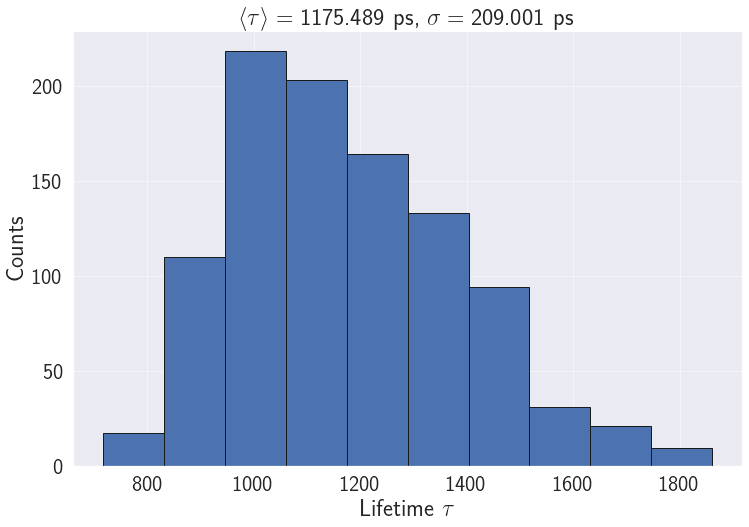

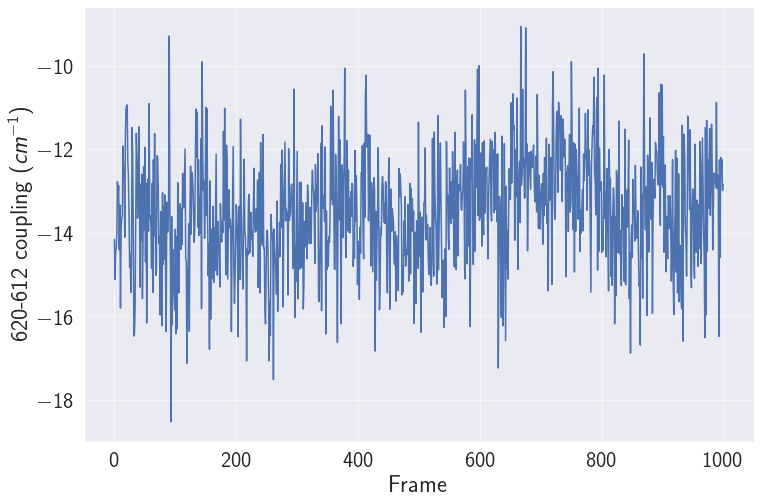

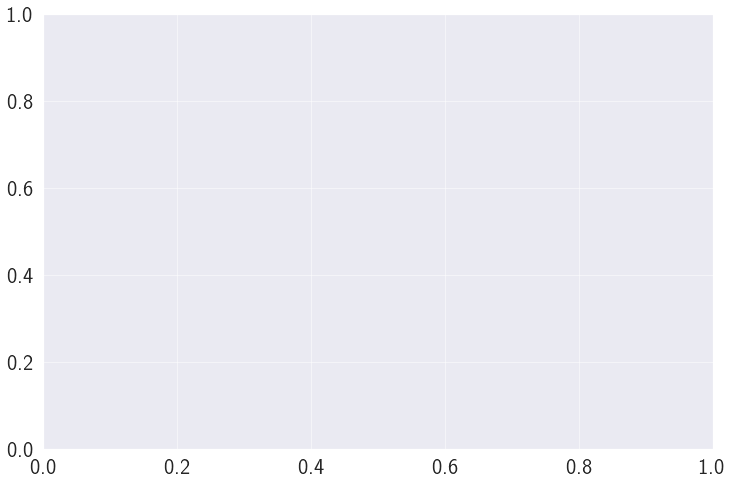

In [67]:
'''
this cell takes one directory and does all the plotting of the averaged data.
Lifetime histogram, 620 dipole moment and 620-612 coupling as a function of frame,
then the averaged exciton participation, RMSDs, dipole angles and pigment couplings
'''
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale=2)
direc = "/home/callum/code/spectra/out/unsteered/frames/E"

pigments = ['CHL601', 'CLA602', 'CLA603', 'CLA604', 'CHL605', 'CHL606', 'CHL607', 'CHL608', 'CHL609', 'CLA610', 'CLA611', 'CLA612', 'CLA613', 'CLA614', 'LUT620', 'LUT621']
valfmt = "{:3.1f}"
valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

''' lifetime histogram'''
tau_avg = np.loadtxt("{}/tau_average.dat".format(direc))
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(np.loadtxt("{}/{}".format(direc,"tau.dat"))[:, 1], edgecolor='k')
ax.set_xlabel(r' Lifetime $ \tau $')
ax.set_ylabel(r'Counts')
ax.set_title(r'$ \left< \tau \right> = {:8.3f} $ ps, $ \sigma = {:8.3f} $ ps'.format(tau_avg[0], tau_avg[1]))
plt.savefig("{}/tau_hist.pdf".format(direc))

'''620-612 coupling'''
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.loadtxt("{}/j620cl.dat".format(direc))[:, 2])
ax.set_ylabel(r'620-612 coupling $ (cm^{-1}) $')
ax.set_xlabel(r'Frame')
fig.savefig("{}/j620612.pdf".format(direc))

'''620 squared dipole moment'''
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.loadtxt("{}/musq620.dat".format(direc)))
ax.set_xlabel("Frame")
ax.set_ylabel(r'$ \mu^{2}_{\text{LUT620}} $')
fig.savefig("{}/musq620.pdf".format(direc))


''' 
big plot with participation / coupling data
this plot is an absolute fucking nightmare!!!
'''
avg_part = np.loadtxt("{}/eig_average.dat".format(direc))
exc_620_coupling = np.loadtxt("{}/exc_620_average.dat".format(direc))
eigvals = np.loadtxt("{}/eigvals_average.dat".format(direc))
eigvals_std = np.loadtxt("{}/eigvals_std.dat".format(direc))

edgecolour='#BBBBBB'
#cm = sns.color_palette("_r", as_cmap=True)
cm = sns.light_palette("firebrick", as_cmap=True)
#cm = sns.dark_palette("seagreen", as_cmap=True)

avg_part = avg_part[:14, :14]
fig, ax = plt.subplots(figsize=(12, 12))
sidey=np.arange(15)
X, Y = np.meshgrid(sidey, sidey)
# - 0.5 for X and Y to centre the data at the exciton numbers - this would start them at 0 though, so shift the tick labels by 1
im = ax.pcolormesh(X - 0.5, Y - 0.5, np.transpose(avg_part), cmap=cm, ec=edgecolour)
ax.set_yticks(np.arange(0, np.shape(avg_part)[0], dtype=int))
ax.set_yticklabels("{:5.0f}".format(eigval) for eigval in eigvals[:14])
#ax.set_yticks(np.arange(0, np.shape(avg_part)[0], dtype=int))
#ax.set_yticklabels([str(i + 1) for i in np.arange(0, np.shape(avg_part)[0], dtype=int)])
ax.set_xticks(np.arange(len(pigments[:14])))
ax.set_xlabel("Pigment")
ax.set_ylabel(r'$ \left< E_{\,\text{\huge{exciton}}} \right> (cm^{-1}) $')
ax.set_xticklabels(pigments[:14])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va="center", rotation_mode="anchor")
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
# for some reason "location" does not work as a kw arg here. the matplotlib docs say it should. fucking useless shit
cax = plt.axes([0.125, 0.03, 0.675, 0.055])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label("Exciton participation")
sideax = plt.axes([0.82, 0.1, 0.09, 0.8])
#sideax.plot(exc_620_coupling[:14])
sidex=np.linspace(-0.5, 0.5, num=2, endpoint=True)
sidey=np.arange(15)
X, Y = np.meshgrid(sidex, sidey)
sideax.pcolormesh(X, Y, np.transpose(exc_620_coupling[np.newaxis, :14]), cmap=cm, ec=edgecolour)
sideax.set_xticks([])
sideax.set_yticks([])
#sideax.yaxis.set_ticks_position('right')
sideax.set_title(r'$ \left< J^{2}_{\text{\Large{exc}},\, \text{\Large{LUT620}}} \right>  $', pad=12.0, fontsize=28)
for i in range(len(exc_620_coupling[:14])):
    sideax.text(0, i + 0.5, "{:3.1f}".format(exc_620_coupling[i]), ha="center", va="center", color="k")
    
plt.savefig("{}/exciton_heatmap.pdf".format(direc), bbox_inches='tight')
# haven't figured out how to represent this with the rest of the data in one plot
#valfmt = matplotlib.ticker.StrMethodFormatter("{x:.2f}")

# or whether it's even possible to do so in an easily readable way. so it's here separately.
#fig, ax = plt.subplots(figsize=(12,8))
#ax.errorbar(np.arange(1, 15, 1), eigvals[:14], yerr=eigvals_std[:14])
#ax.set_ylabel(r'Exciton energy $ (cm^{-1}) $')
#ax.set_xlabel(r'Exciton')

def plot_heatmap(data, out, *args, kwargs={}, plot_kwargs={}, cbar_kwargs={}):
    '''
    Easily plot a heatmap with controllable axis labels, tick labels, colour
    bar details and various other things. Note that you have to construct the
    kwargs dictionaries yourself and change/delete keys as needed. This is
    because normally you'd just have one kwargs with all the keyword arguments
    in it, but I wanted to be able to set plot parameters and colour bar
    parameters separately, and you can't pull out chunks of the normal kwargs
    dictionary to pass them to the plot or colour bar as **kwargs.
    '''
    fig, ax = plt.subplots(figsize=(12, 12))
    if 'title' in kwargs:
        plt.title(kwargs['title'])
        
    if 'cmap' in kwargs:
        cm = kwargs['cmap']
    else:
        cm = "RdBu_r"
            
    X, Y = np.meshgrid(np.arange(np.shape(data)[0] + 1), np.arange(np.shape(data)[1] + 1))
    # - 0.5 for X and Y to centre the data on the ticks
    im = ax.pcolormesh(X - 0.5, Y - 0.5, data, cmap=cm, ec="#BBBBBB", **plot_kwargs)
    if 'xlabel' in kwargs:
        ax.set_xlabel(kwargs['xlabel'])
    
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
    
    if 'ticklabels' in kwargs:
        kwargs['x_ticklabels'] = kwargs['ticklabels']
        kwargs['y_ticklabels'] = kwargs['ticklabels']
    
    if 'y_ticklabels' in kwargs:
        ax.set_yticks(np.arange(len(kwargs['y_ticklabels'])))
        ax.set_yticklabels(kwargs['y_ticklabels'])
        
    if 'x_ticklabels' in kwargs:
        ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_label_position('top')
        ax.set_xticks(np.arange(len(kwargs['x_ticklabels'])))
        ax.set_xticklabels(kwargs['x_ticklabels'])
        plt.setp(ax.get_xticklabels(), rotation=90, ha="left", va="center", rotation_mode="anchor")
        
    cax = plt.axes([0.125, 0.05, 0.775, 0.055])
    cbar = fig.colorbar(im, cax=cax, orientation='horizontal', **cbar_kwargs)
            
    if 'cbar_label' in kwargs:
        cbar.set_label(kwargs['cbar_label']) 
        
    if 'cbar_ticklabels' in kwargs:
        cbar.ax.set_xticklabels(kwargs['cbar_ticklabels'])
        
    fig.savefig(out)
    
kwargs = {
    'cmap' : sns.color_palette("flare", as_cmap=True),
    'ticklabels' : pigments,
    'xlabel' : r'Pigment',
    'ylabel' : r'Pigment',
    'cbar_label' : r'RMSD $ (\text{\AA}) $',
}

rmsd = np.loadtxt("{}/rmsd_average.dat".format(direc))
rmsd = np.ma.masked_where(rmsd < 0.1, rmsd)
plot_heatmap(rmsd, "{}/rmsd.pdf".format(direc), kwargs=kwargs)

theta = np.loadtxt("{}/theta_average.dat".format(direc))

plot_kwargs = {
    'vmin' : 0.,
    'vmax' : np.pi,
}

cbar_kwargs = {
    'ticks' : [0., np.pi/4., np.pi/2., 3. * np.pi / 4., np.pi],
}

kwargs['cmap'] = "RdBu_r"
kwargs['cbar_ticklabels'] = [r'$ 0 $', r'$ \frac{\pi}{4} $', r'$ \frac{\pi}{2} $', r'$ \frac{3\pi}{4} $', r'$ \pi $']
kwargs['cbar_label'] = r'$ \theta $'
plot_heatmap(theta, "{}/theta.pdf".format(direc), kwargs=kwargs, plot_kwargs=plot_kwargs, cbar_kwargs=cbar_kwargs)

jij = np.loadtxt("{}/jij_average.dat".format(direc))
kwargs['cmap'] = "RdBu_r"
kwargs['cbar_label'] = r'$ J_{ij} (\text{cm}^{-1}) $'
plot_kwargs['vmin'] = -50.
plot_kwargs['vmax'] = +50.
del kwargs['cbar_ticklabels']
plot_heatmap(np.ma.masked_where(jij > 1000.0, jij), "{}/jij.pdf".format(direc), kwargs=kwargs, plot_kwargs=plot_kwargs)


In [ ]:
th_mon = np.loadtxt("{}/theta_average_wt_1_1.dat".format("/home/callum/code/spectra/out/wt/1/1"))
th_st = np.loadtxt("{}/theta_average_vangelis_h_6.dat".format("/home/callum/code/spectra/out/tLHCII_NpH/test/H/6"))
ka_mon = np.loadtxt("{}/kappa_average.dat".format("/home/callum/code/spectra/out/wt/1/1"))
ka_st = np.loadtxt("{}/kappa_average.dat".format("/home/callum/code/spectra/out/tLHCII_NpH/test/H/6"))

th_diff = th_mon - th_st
ka_diff = ka_mon - ka_st
sns.heatmap(th_diff)
plot_heatmap(th_diff * (180. / np.pi), "RdBu_r", pigments, pigments, "Pigment", "Pigment", r' $ \theta $', "{}/th_diff.pdf".format("/home/callum/code/spectra/out"))
plot_heatmap(ka_diff, "RdBu_r", pigments, pigments, "Pigment", "Pigment", r' $ \kappa_{m} - \kappa_{s} $', "{}/ka_diff.pdf".format("/home/callum/code/spectra/out"))